In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import fipy as fp

from tools.smtutils import smt2df, delete_smt_record
from tools.plot import plot_avrami, plot_energy, plot_fraction, plot_count, plot_phi

In [155]:
project, df = smt2df()

In [12]:
df[['label', 'reason', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart', 'reason', 'outcome']]

,label,reason,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart,reason,outcome
0,02ce60aa08f2,,2019-10-24 22:21:21,10.799213,32,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,Data/36ac86beed75/t=236.0.tar.gz,,
1,0424e0e78311,,2020-02-01 21:56:40,26936.554325,16,"[_finished_, rev2]",benchmark8b.py,500.0,500.0,0.8,0.04,1.10,None,,
2,0fb3c4956568,,2019-10-18 10:38:09,NaN,4,[_running_],benchmark8c.py,1000.0,1000.0,0.8,0.04,1.10,Data/8c61a15b939e/t=0.0.tar.gz,,
3,106f1ffc19bd,,2019-10-11 20:47:52,3.513146,1,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None,,
4,17e8566d9da6,MPIscaling,2019-10-18 16:31:41,5168.995170,2,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.40,1.10,Data/8c61a15b939e/t=0.0.tar.gz,MPIscaling,
5,19de55b23444,MPIscaling2,2019-10-18 21:34:49,1195.207554,16,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.40,1.10,Data/8c61a15b939e/t=0.0.tar.gz,MPIscaling2,
6,1a08233a33cc,,2019-10-18 12:21:02,166.683551,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,4.00,1.10,Data/8c61a15b939e/t=0.0.tar.gz,,
7,1a4a48b04833,,2019-10-18 12:18:18,66.483360,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.04,1.10,Data/8c61a15b939e/t=0.0.tar.gz,,
8,1d25ba5b1764,,2019-10-18 12:19:36,80.861085,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.40,1.10,Data/8c61a15b939e/t=0.0.tar.gz,,
9,2075c90bf083,,2019-10-16 15:12:37,1529.424372,16,[_finished_],benchmark8a.py,100.0,100.0,0.4,1.00,1.00,None,,


## Benchmark 8a

In [5]:
df[df['main_file'] == 'benchmark8a.py'][['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
8,2075c90bf083,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:12:37,16,1529.424372,[_finished_],100.0,100.0,0.4,1.00,1.00,None
13,2b431168edc3,b5c996bfaf8daac05e2d49c3ed4fc44bffd73bd0,2019-10-16 11:55:09,16,191.586053,[_failed_],100.0,100.0,0.4,0.01,1.00,None
25,4e9f584b82e2,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:56:47,16,646.527161,[_finished_],100.0,100.0,0.4,1.00,0.99,None
30,5b147f7a03fc,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 16:09:08,16,6288.367838,[_finished_],100.0,100.0,0.4,0.01,1.01,None
34,68d4de7ceac7,16e266bc1471fde611ea77c9ed43b9a383dca5ff,2019-10-16 11:51:07,16,40.346007,[_failed_],100.0,100.0,0.4,0.01,1.00,None
46,9eca8e56756c,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 16:20:52,16,1267.267800,[_finished_],100.0,100.0,0.4,0.10,1.01,None
47,9fe80a61913f,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 13:14:19,16,4852.530247,[_failed_],100.0,100.0,0.4,0.01,1.00,None
52,ac8f3c0527c6,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:56:47,16,1273.119492,[_finished_],100.0,100.0,0.4,0.10,0.99,None
53,ad50b5b0effd,8efb68b582466f94b35ccebf7b8aacdfa165ea5c,2019-10-16 09:08:31,16,1.390398,[_failed_],100.0,100.0,0.4,0.01,0.99,None
54,aed02552f12a,8efb68b582466f94b35ccebf7b8aacdfa165ea5c,2019-10-16 09:08:31,16,1.189000,[_failed_],100.0,100.0,0.4,0.01,1.01,None


In [6]:
df[(df['main_file'] == 'benchmark8a.py') & (df['--dt'] == 0.1)][['label', 'version', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
46,9eca8e56756c,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 16:20:52,1267.267800,[_finished_],100.0,100.0,0.4,0.1,1.01,None
52,ac8f3c0527c6,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:56:47,1273.119492,[_finished_],100.0,100.0,0.4,0.1,0.99,None
71,f3c07c99154e,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:12:04,1694.457917,[_finished_],100.0,100.0,0.4,0.1,1.00,None


In [15]:
bm8a_dt1_0 = df[(df['main_file'] == 'benchmark8a.py') & (df['--dt'] == 1.0)]
bm8a_dt1_0[['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
14,2075c90bf083,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:12:37,16,1529.424372,[_finished_],100.0,100.0,0.4,1.0,1.00,None
16,4e9f584b82e2,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 15:56:47,16,646.527161,[_finished_],100.0,100.0,0.4,1.0,0.99,None
20,beaddcd9597f,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 16:46:39,16,464.472270,[_finished_],100.0,100.0,0.4,1.0,1.01,None


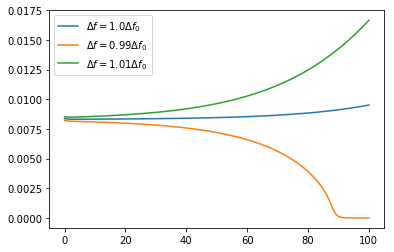

In [17]:
bm8a_dt1_0.apply(plot_fraction, axis=1)
plt.legend(loc="upper left")

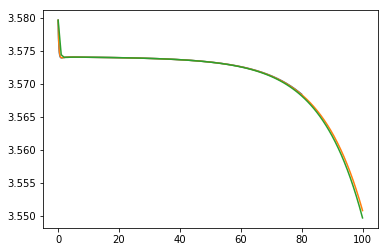

In [117]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

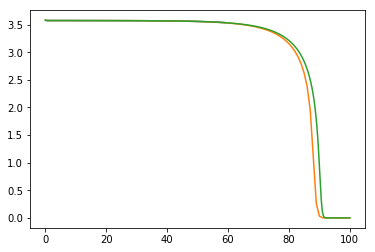

In [122]:
for uuid in ['ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

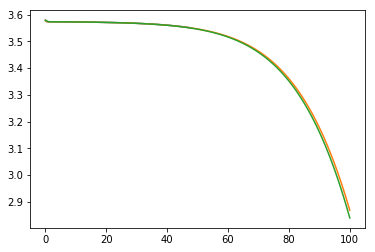

In [124]:
for uuid in ['5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

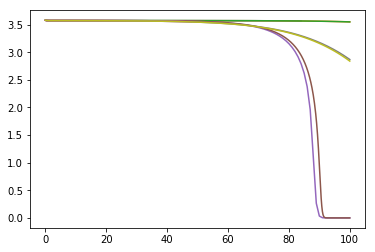

In [125]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, energy)

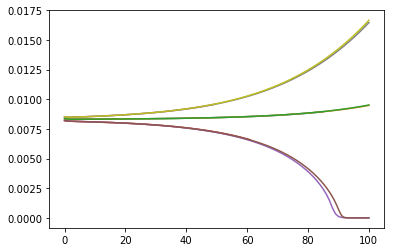

In [126]:
for uuid in ['f3fb2784e79c', 'f3c07c99154e', '2075c90bf083', 'ce2c99537cd1', '4e9f584b82e2', 'ac8f3c0527c6', '5b147f7a03fc', '9eca8e56756c', 'beaddcd9597f']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{}/stats.txt".format(uuid), unpack=True)
#    plt.loglog(tt, -fp.tools.log10(1-fraction))
    plt.plot(tt, fraction)

## Benchmark 8b

In [5]:
df[df['main_file'] == 'benchmark8b.py'][['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
0,02ce60aa08f2,ce02d3b783223d20a1f26e99b631c073bf4c2ab1,2019-10-24 22:21:21,32,10.799213,[_failed_],1000.0,1000.0,0.8,0.04,1.1,Data/36ac86beed75/t=236.0.tar.gz
1,0424e0e78311,f36b4cc2f5fda3cd03104ba10b2724d20d8f4a43,2020-02-01 21:56:40,16,26936.554325,"[_finished_, rev2]",500.0,500.0,0.8,0.04,1.1,None
3,106f1ffc19bd,206c52475b47a4b5b47632835f1654a18fb26f49,2019-10-11 20:47:52,1,3.513146,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
17,31058b7cf06d,3ff911725960a76c6ca1807c0bb9357be3378f91,2019-10-15 11:26:36,1,25.609991,[_failed_],1000.0,1000.0,0.8,0.04,1.1,None
18,3544804c18a0,47494c05faac4f6c010e24f84ad4a071582be0ba,2019-10-15 16:27:27,32,1186.884687,[_finished_],100.0,100.0,0.8,0.04,1.1,None
19,36ac86beed75,abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,2019-10-16 17:57:12,64,17601.494615,[_failed_],1000.0,1000.0,0.8,0.04,1.1,Data/e97d9c91f2b4/t=116.0.tar.gz
23,44de181cfb8f,f36b4cc2f5fda3cd03104ba10b2724d20d8f4a43,2020-02-01 21:56:40,16,26617.134874,"[_finished_, rev2]",500.0,500.0,0.8,0.04,1.1,None
25,478689a9d6ea,ce02d3b783223d20a1f26e99b631c073bf4c2ab1,2019-10-24 22:23:14,32,1094.853523,[_finished_],1000.0,1000.0,0.8,4.00,1.1,None
42,8795840f9691,5b9eba4e38da89fe67a4c3eeaaeb5c095dd33118,2020-02-01 10:03:36,16,13.932096,"[_failed_, rev2]",500.0,500.0,0.8,0.04,1.1,None
43,8804caa7be72,c89620591296c91aa06ca0f1cf725b1ff18da71c,2019-10-25 13:08:09,32,3315.118001,[_finished_],1000.0,1000.0,0.8,0.04,1.1,Data/a4f1d79bebc8/t=360.0.tar.gz


In [10]:
bm8b = df[(df['main_file'] == 'benchmark8b.py') & df['tags'].map(lambda x: '_finished_' in x and 'rev2b' in x)]
bm8b[['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
0,01ab28a0a143,61e09278d79f7bc38532f8a2b2c3cfa8f8156377,2020-02-02 20:30:20,16,27167.470856,"[_finished_, rev2b]",500.0,500.0,0.8,0.04,1.1,None
1,027cb4068de7,61e09278d79f7bc38532f8a2b2c3cfa8f8156377,2020-02-02 20:30:20,16,26869.589471,"[_finished_, rev2b]",500.0,500.0,0.8,0.04,1.1,None
4,0f2fb5efbba5,61e09278d79f7bc38532f8a2b2c3cfa8f8156377,2020-02-02 20:30:16,16,27042.667233,"[_finished_, rev2b]",500.0,500.0,0.8,0.04,1.1,None
55,9d0b6c25ec5b,61e09278d79f7bc38532f8a2b2c3cfa8f8156377,2020-02-02 20:30:16,16,26846.442714,"[_finished_, rev2b]",500.0,500.0,0.8,0.04,1.1,None


In [203]:
from tools.plot import load_stats

def stats_frame(record):
    tt, fraction, particle_count, energy = load_stats(record)
    return pd.DataFrame({'time': tt, 'fraction': fraction, 'particle_count': particle_count, 'energy': energy})
stats = pd.concat(list(bm8b.apply(stats_frame, axis=1)))
stats['JMAK'] = -np.log10(1 - stats.fraction)
stats

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


,energy,fraction,particle_count,time,JMAK
0,28.516358,0.001995,25.0,0.00,0.000867
1,28.349340,0.001994,25.0,0.04,0.000867
2,28.214039,0.001994,25.0,0.08,0.000867
3,28.103650,0.001994,25.0,0.12,0.000867
4,28.012971,0.001995,25.0,0.16,0.000867
5,27.937977,0.001995,25.0,0.20,0.000867
6,27.875534,0.001996,25.0,0.24,0.000868
7,27.823173,0.001997,25.0,0.28,0.000868
8,27.778942,0.001998,25.0,0.32,0.000869
9,27.741286,0.001999,25.0,0.36,0.000869


In [204]:
by_row_index = stats.groupby(stats.index)
by_row_index

In [205]:
from scipy import optimize

mask = (by_row_index.mean().time > 20) & (by_row_index.mean().time < 200)
logx = np.log10(by_row_index.mean()[mask].time)
logy = np.log10(by_row_index.mean()[mask].JMAK)
logyerr = by_row_index.std()[mask].JMAK / by_row_index.mean()[mask].JMAK

powerlaw = lambda x, amp, index: amp * (x**index)
fitfunc = lambda p, x: p[0] + p[1] * x   
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print pfinal
print covar

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[0][0] ) 
ampErr = np.sqrt( covar[1][1] ) * amp

print indexErr
print ampErr

[-5.31286561  2.3189401 ]
[[ 7.81203167e-06 -5.14789225e-06]
 [-5.14789225e-06  3.42008299e-06]]
0.0027950011927571554
8.998139394423976e-09


tools/plot.py:55: RuntimeWarning: invalid value encountered in log10
  tt, fraction, particle_count, energy = load_stats(record)


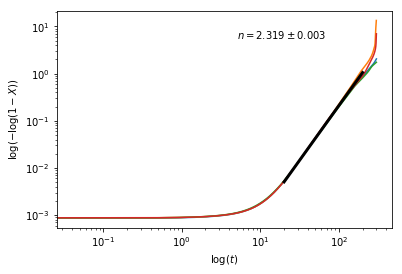

In [207]:
bm8b.apply(plot_avrami, axis=1)
plt.plot(by_row_index.mean()[mask].time, powerlaw(by_row_index.mean()[mask].time, amp, index), color="black", linewidth=3)
plt.text(5, 5.5, '$n = %5.3f \pm %5.3f$' % (index, indexErr))
plt.ylabel("$\log(-\log(1-X))$")
plt.xlabel("$\log(t)$")

plt.savefig('benchmark_8/8b/avrami.png')
# plt.legend(loc="upper left")

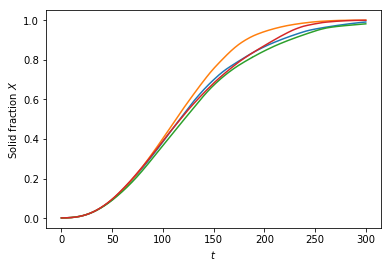

In [208]:
bm8b.apply(plot_fraction, axis=1)
plt.ylabel("Solid fraction $X$")
plt.xlabel("$t$")

plt.savefig('benchmark_8/8b/fraction.png')
# plt.legend(loc="upper left")

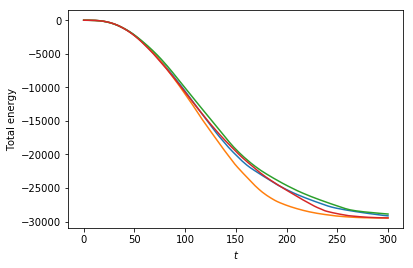

In [209]:
bm8b.apply(plot_energy, axis=1)
plt.ylabel("Total energy")
plt.xlabel("$t$")

plt.savefig('benchmark_8/8b/energy.png')
# plt.legend(loc="upper right")

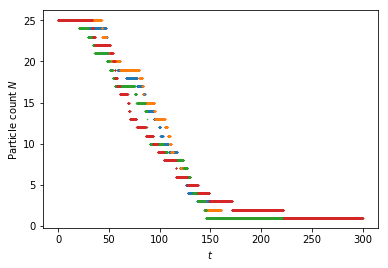

In [210]:
bm8b.apply(plot_count, axis=1)
plt.ylabel("Particle count $N$")
plt.xlabel("$t$")

plt.savefig('benchmark_8/8b/count.png')
# plt.legend(loc="upper right")

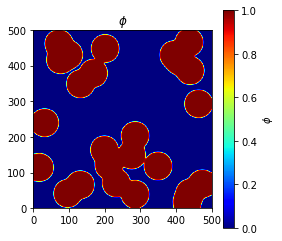

0     None
1     None
4     None
55    None
dtype: object

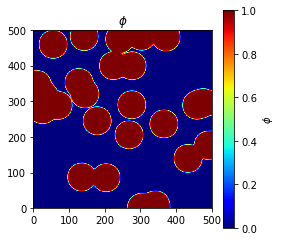

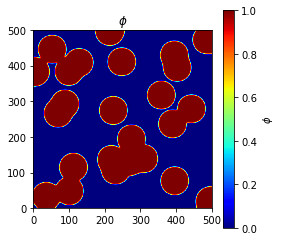

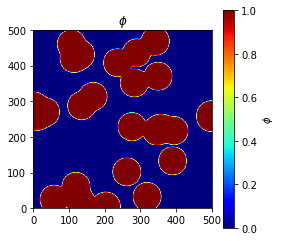

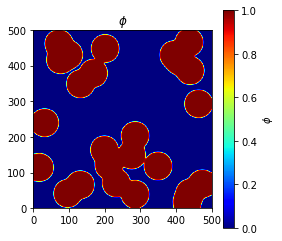

In [130]:
bm8b.apply(plot_phi, timestep=100., axis=1)
#plt.ylabel("Particle count $N$")
#plt.xlabel("$t$")


In [148]:
!ls benchmark_8/8b

01ab28a0a143.txt  0f2fb5efbba5.txt  avrami.png	energy.png
027cb4068de7.txt  9d0b6c25ec5b.txt  count.png	fraction.png


In [149]:
!git add benchmark_8/8b/01ab28a0a143.txt benchmark_8/8b/027cb4068de7.txt benchmark_8/8b/0f2fb5efbba5.txt benchmark_8/8b/9d0b6c25ec5b.txt benchmark_8/8b/avrami.png benchmark_8/8b/count.png benchmark_8/8b/energy.png benchmark_8/8b/fraction.png

In [152]:
!git st

On branch master
Your branch is ahead of 'origin/master' by 11 commits.
  (use "git push" to publish your local commits)
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   analysis.ipynb
	new file:   benchmark_8/8b/01ab28a0a143.txt
	new file:   benchmark_8/8b/027cb4068de7.txt
	new file:   benchmark_8/8b/0f2fb5efbba5.txt
	new file:   benchmark_8/8b/9d0b6c25ec5b.txt
	deleted:    benchmark_8/8b/Sumatra.36ac86beed75.json
	new file:   benchmark_8/8b/avrami.png
	new file:   benchmark_8/8b/count.png
	new file:   benchmark_8/8b/energy.png
	new file:   benchmark_8/8b/fraction.png
	deleted:    benchmark_8/8b/stats.txt
	deleted:    benchmark_8/8b/t=80.0.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.#problem8b.sh
	17396f08a3ab.yaml
	count.prof
	profile8b.yaml



In [153]:
!git ci -m "Update results for 8b"

[master 034fb8d6] Update results for 8b
 12 files changed, 31035 insertions(+), 6170 deletions(-)
 create mode 100644 benchmark_8/8b/01ab28a0a143.txt
 create mode 100644 benchmark_8/8b/027cb4068de7.txt
 create mode 100644 benchmark_8/8b/0f2fb5efbba5.txt
 create mode 100644 benchmark_8/8b/9d0b6c25ec5b.txt
 delete mode 100644 benchmark_8/8b/Sumatra.36ac86beed75.json
 create mode 100644 benchmark_8/8b/avrami.png
 create mode 100644 benchmark_8/8b/count.png
 create mode 100644 benchmark_8/8b/energy.png
 create mode 100644 benchmark_8/8b/fraction.png
 delete mode 100644 benchmark_8/8b/stats.txt
 delete mode 100644 benchmark_8/8b/t=80.0.png


In [142]:
import shutil

def copy_stats(record):
    fname = "Data/{}/stats.txt".format(record["label"])
    tname = "benchmark_8/8b/{}.txt".format(record["label"])
    shutil.copy(fname, tname)
    
bm8b.apply(copy_stats, axis=1)

0     None
1     None
4     None
55    None
dtype: object

## Benchmark 8c

In [ ]:
df[df['main_file'] == 'benchmark8c.py'][['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

<<<<<<< local


,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart


,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
22,a8d8c8c53199,1beacc9ffe50e927791a6321bac295bd1c7b0082,2019-10-17 17:03:28,64,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
23,65ac831fdaaf,b87399ddf3c14ee46005b9b16db22e5a3618c38a,2019-10-17 19:09:00,64,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,None
24,8c61a15b939e,b87399ddf3c14ee46005b9b16db22e5a3618c38a,2019-10-17 19:12:21,64,5438.171248,[_finished_],1000.0,1000.0,0.8,4.00,1.1,None
25,5a7ce705a1c9,b87399ddf3c14ee46005b9b16db22e5a3618c38a,2019-10-17 20:43:49,64,13514.149437,[_finished_],1000.0,1000.0,0.8,0.40,1.1,None
26,bf00cede67ae,fc96a17b57c5ec402ab6b07290da88cf4d1cd6f6,2019-10-18 09:30:35,64,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz
27,5f02c01d54c1,1b7f4197f7b18e45af8cf03f1bd1b7585c75b4de,2019-10-18 10:25:38,4,12.403628,[_failed_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz
28,c6784dcd8e50,afb8fd68b2ee2d66459438e5204c756d984db8e8,2019-10-18 10:29:46,4,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz
29,0fb3c4956568,dc80f256b2a7590b44eaa4f41c56b22da1b86018,2019-10-18 10:38:09,4,NaN,[_running_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz
30,80f3c495e8d3,6a9cd16fdfc76bab5daa8e937e14c4565eec0a44,2019-10-18 12:14:47,4,28.076006,[_finished_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz
31,1a4a48b04833,0e069ea637dd220e1c2fb5cf1967329a530f9665,2019-10-18 12:18:18,4,66.483360,[_finished_],1000.0,1000.0,0.8,0.04,1.1,Data/8c61a15b939e/t=0.0.tar.gz


>>>>>>> remote


In [9]:
df[(df['main_file'] == 'benchmark8c.py') & (df['--dt'] == 4.0)][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
24,8c61a15b939e,2019-10-17 19:12:21,5438.171248,[_finished_],1000.0,1000.0,0.8,4.0,1.1,None
33,1a08233a33cc,2019-10-18 12:21:02,166.683551,[_finished_],1000.0,1000.0,0.8,4.0,1.1,Data/8c61a15b939e/t=0.0.tar.gz
34,4235ab45eb3a,2019-10-18 12:39:55,158.621054,[_finished_],1000.0,1000.0,0.8,4.0,1.1,Data/8c61a15b939e/t=0.0.tar.gz
35,52e3d6066991,2019-10-18 13:50:50,147.482817,[_finished_],1000.0,1000.0,0.8,4.0,1.1,Data/8c61a15b939e/t=0.0.tar.gz
53,59b973325e9e,2019-10-19 14:12:08,1599.519187,[_finished_],1000.0,1000.0,0.8,4.0,1.1,Data/8c61a15b939e/t=0.0.tar.gz


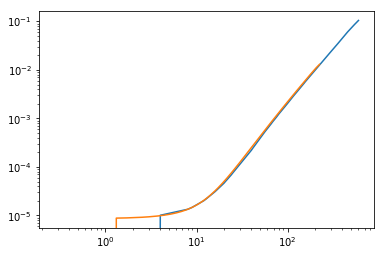

In [19]:
for uuid in ['8c61a15b939e', '5a7ce705a1c9']:
    tt, fraction, energy = fp.numerix.loadtxt("Data/{uuid}/stats.txt".format(uuid=uuid), unpack=True)
    plt.loglog(tt, -fp.tools.log10(1-fraction))

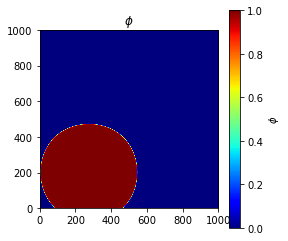

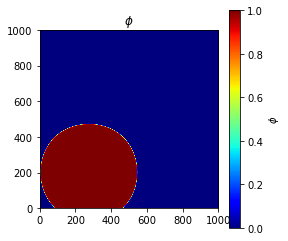

In [25]:
phi, = fp.tools.dump.read("Data/8c61a15b939e/t=600.0.tar.gz")
fp.Viewer(vars=phi).plot()

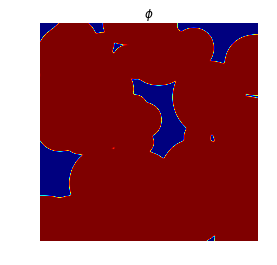

In [12]:
phi, = fp.tools.dump.read("Data/59b973325e9e/t=400.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.image.write_png("Data/59b973325e9e/t=400.0.png")

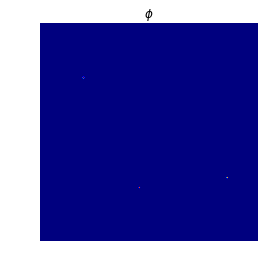

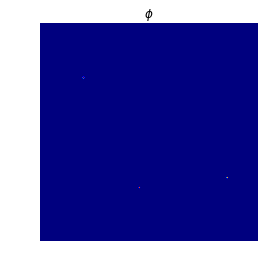

In [14]:
phi, = fp.tools.dump.read("Data/52e3d6066991/t=10.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.image.write_png("Data/52e3d6066991/t=10.0.png")
vw.plot()

In [15]:
scaling = df[(df['reason'] == "MPIscaling") & df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]
scaling

,label,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
36,c520aaa5d948,2019-10-18 16:14:58,971.150094,64,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
37,3d845875dcd6,2019-10-18 16:31:40,1074.925342,32,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
38,17e8566d9da6,2019-10-18 16:31:41,5168.995170,2,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
39,2e065ac0cf97,2019-10-18 16:31:42,8574.877326,1,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
40,694af126a4f8,2019-10-18 16:31:42,2037.635763,8,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
41,2a60d1018957,2019-10-18 16:31:42,3054.095550,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
42,feced507da09,2019-10-18 16:31:42,1405.401850,16,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz


Spending too much time checkpointing?

In [16]:
scaling2 = df[(df['reason'] == "MPIscaling2") & df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'nproc', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]
scaling2

,label,timestamp,duration,nproc,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
44,79d06f20e32e,2019-10-18 21:22:19,708.182221,64,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
45,c647f4215487,2019-10-18 21:34:45,4578.593929,2,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
46,26146cca1862,2019-10-18 21:34:48,2740.745837,4,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
47,f113793b0801,2019-10-18 21:34:46,1769.716540,8,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
48,19de55b23444,2019-10-18 21:34:49,1195.207554,16,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
49,8e5711c51ab8,2019-10-18 21:34:49,7995.469502,1,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz
50,d196ac2adac3,2019-10-18 21:34:44,923.132135,32,[_finished_],benchmark8c.py,1000.0,1000.0,0.8,0.4,1.1,Data/8c61a15b939e/t=0.0.tar.gz


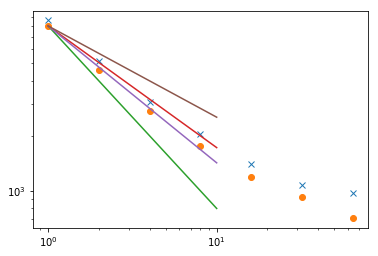

In [32]:
plt.loglog(scaling['nproc'], scaling['duration'], linestyle="", marker="x")
plt.loglog(scaling2['nproc'], scaling2['duration'], linestyle="", marker="o")
A = 8e3
dx = 10
plt.loglog([1, dx], [A, A * dx**-1])
plt.loglog([1, dx], [A, A * dx**-.6666])
plt.loglog([1, dx], [A, A * dx**-.75])
plt.loglog([1, dx], [A, A * dx**-.5])


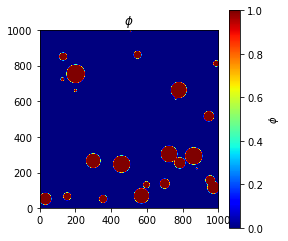

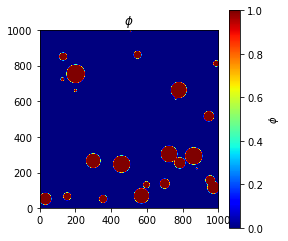

In [11]:
phi, = fp.tools.dump.read("Data/bb035c2fd44a/t=128.0.tar.gz")
vw = fp.Viewer(vars=phi)
vw.plot()

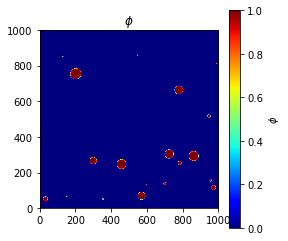

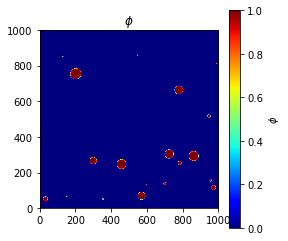

In [41]:
phi_04, = fp.tools.dump.read("Data/bb035c2fd44a/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi_04)
vw.plot()

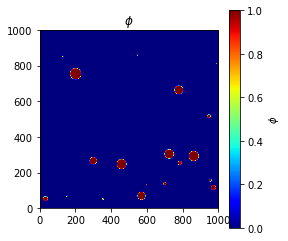

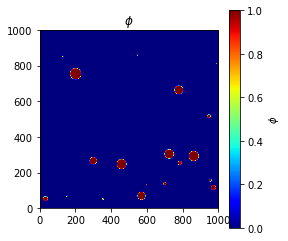

In [42]:
phi_4, = fp.tools.dump.read("Data/7d2f69a2507a/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi_4)
vw.plot()

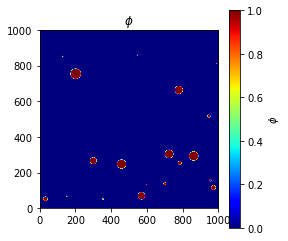

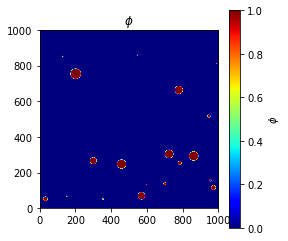

In [43]:
phi4, = fp.tools.dump.read("Data/59b973325e9e/t=80.0.tar.gz")
vw = fp.Viewer(vars=phi4)
vw.plot()

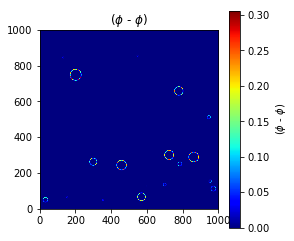

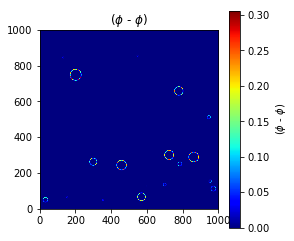

In [44]:
vw = fp.Viewer(vars=phi_4 - phi_04)
vw.plot()

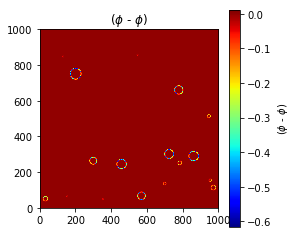

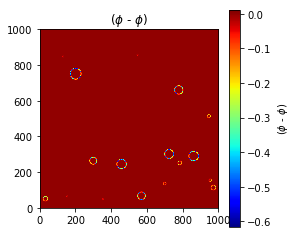

In [45]:
vw = fp.Viewer(vars=phi4 - phi_4)
vw.plot()

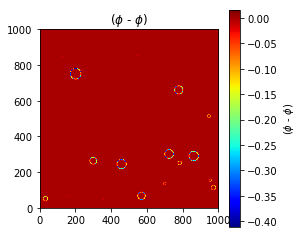

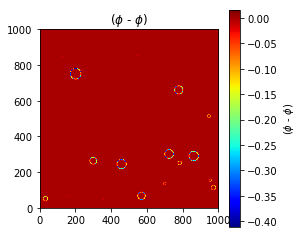

In [46]:
vw = fp.Viewer(vars=phi4 - phi_04)
vw.plot()

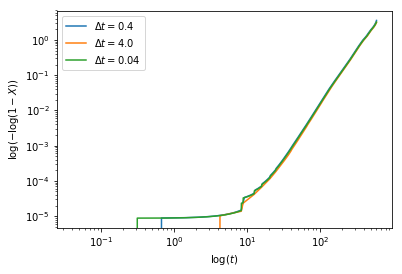

In [12]:
df[df.label.apply(lambda x: x in ["59b973325e9e", "7d2f69a2507a", "5b4447b81e13"])].apply(plot_avrami, axis=1)
plt.ylabel("$\log(-\log(1-X))$")
plt.xlabel("$\log(t)$")
plt.legend(loc="upper left")

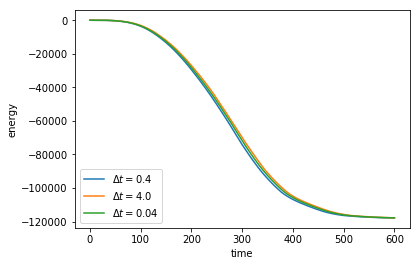

In [13]:
df[df.label.apply(lambda x: x in ["59b973325e9e", "7d2f69a2507a", "5b4447b81e13"])].apply(plot_energy, axis=1)
plt.ylabel("energy")
plt.xlabel("time")
plt.legend(loc="lower left")

## Benchmark 8d

In [156]:
df[df['main_file'] == 'benchmark8d.py'][['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
7,17396f08a3ab,0a8ff0c5800e84ffce0f0631e456dddf79e72348,2020-02-03 10:13:18,16,NaN,[_running_],40.0,20.0,0.2,1.00,1.04,None
14,25645475dafd,10c03ad9d19de082a01b1251d365619aabe6f9c0,2019-10-21 17:09:52,4,NaN,[_running_],40.0,20.0,0.4,0.01,1.00,None
16,2a28eee8e320,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:51:52,4,10268.162539,[_finished_],40.0,20.0,0.4,0.10,0.98,None
19,2ddc69abe021,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:51:18,4,10209.321030,[_finished_],40.0,20.0,0.4,0.10,1.00,None
24,3b9c156317ab,10c03ad9d19de082a01b1251d365619aabe6f9c0,2019-10-21 17:09:58,4,NaN,[_running_],40.0,20.0,0.4,0.01,1.02,None
28,465b621b1181,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:51:34,4,10183.188251,[_finished_],40.0,20.0,0.4,0.10,1.02,None
33,5370d7995942,fa61140253b73b7f3723396e2e21924e706e42be,2019-10-22 08:08:26,4,943.737592,[_finished_],40.0,20.0,0.4,1.00,1.02,None
44,80920a99b0e1,fa61140253b73b7f3723396e2e21924e706e42be,2019-10-22 08:08:36,4,940.750655,[_finished_],40.0,20.0,0.4,1.00,0.98,None
49,8d50f08432ee,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:52:21,4,2261.319754,[_finished_],40.0,20.0,0.4,0.98,1.00,None
58,a20c7afa3550,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:52:04,4,2111.258554,[_finished_],40.0,20.0,0.4,1.02,1.00,None


In [158]:
bm8d = df[(df['main_file'] == 'benchmark8d.py') & df['tags'].map(lambda x: '_finished_' in x and '8d' in x)]
bm8d[['label', 'version', 'timestamp', 'nproc', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,nproc,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
79,d5cb1c28e0e1,0a8ff0c5800e84ffce0f0631e456dddf79e72348,2020-02-03 10:12:50,8,19741.144799,"[8d, _finished_]",40.0,20.0,0.4,1.0,1.04,None


In [190]:
!mkdir "benchmark_8/8d/8d_1.04f"

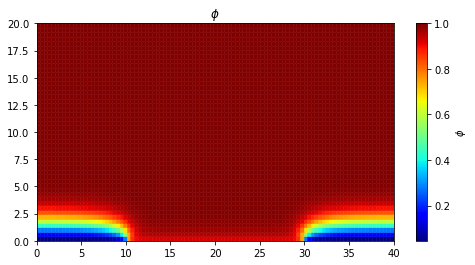

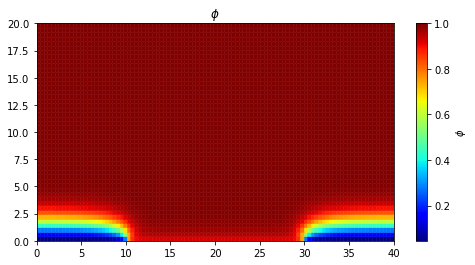

In [193]:
bm8d.apply(plot_phi, timestep=6500., axis=1)
plt.savefig("benchmark_8/8d/8d_1.04f/t=6500.0.png")

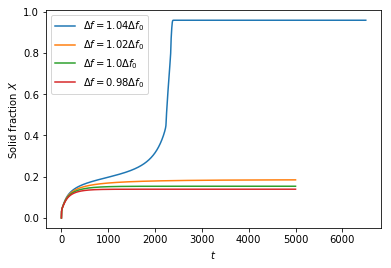

In [199]:
df[(df['main_file'] == 'benchmark8d.py') & df['tags'].map(lambda x: '_finished_' in x) & (df['--dt'] == 1.)].sort_values('--factor', ascending=False).apply(plot_fraction, axis=1)
plt.ylabel("Solid fraction $X$")
plt.xlabel("$t$")
plt.legend(loc="middle right")
plt.savefig("benchmark_8/8d/8d_1.04f/fraction.png")

In [202]:
!ls benchmark_8/8d/8d_1.04f/

d5cb1c28e0e1.txt  fraction.png	t=6500.0.png


In [201]:
import shutil

def copy_stats(record):
    fname = "Data/{}/stats.txt".format(record["label"])
    tname = "benchmark_8/8d/8d_1.04f/{}.txt".format(record["label"])
    shutil.copy(fname, tname)
    
bm8d.apply(copy_stats, axis=1)

79    None
dtype: object

In [ ]:
df[(df['main_file'] == 'benchmark8d.py') & df['tags'].map(lambda x: '_finished_' in x)].sort_values

project.add_comment("a20c7afa3550", "Swapped dt and factor by mistake")
project.add_comment("8d50f08432ee", "Swapped dt and factor by mistake")

In [6]:
df[df['main_file'] == 'benchmark8d.py'][['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart', 'outcome']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart,outcome
58,25645475dafd,2019-10-21 17:09:52,NaN,[_running_],40.0,20.0,0.4,0.01,1.00,None,
59,e64424306261,2019-10-21 17:09:56,NaN,[_running_],40.0,20.0,0.4,0.01,0.98,None,
60,3b9c156317ab,2019-10-21 17:09:58,NaN,[_running_],40.0,20.0,0.4,0.01,1.02,None,
61,2ddc69abe021,2019-10-21 19:51:18,10209.321030,[_finished_],40.0,20.0,0.4,0.10,1.00,None,
62,465b621b1181,2019-10-21 19:51:34,10183.188251,[_finished_],40.0,20.0,0.4,0.10,1.02,None,
63,2a28eee8e320,2019-10-21 19:51:52,10268.162539,[_finished_],40.0,20.0,0.4,0.10,0.98,None,
64,dea054043623,2019-10-21 19:51:57,2109.698819,[_finished_],40.0,20.0,0.4,1.00,1.00,None,
65,a20c7afa3550,2019-10-21 19:52:04,2111.258554,[_finished_],40.0,20.0,0.4,1.02,1.00,None,Swapped dt and factor by mistake
66,8d50f08432ee,2019-10-21 19:52:21,2261.319754,[_finished_],40.0,20.0,0.4,0.98,1.00,None,Swapped dt and factor by mistake
67,5370d7995942,2019-10-22 08:08:26,943.737592,[_finished_],40.0,20.0,0.4,1.00,1.02,None,


In [8]:
df[(df['main_file'] == 'benchmark8d.py') & (df['--dt'] == 1.0)][['label', 'version', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,version,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
64,dea054043623,d6b43e0d9c6dda5a9b094a6b2a6b288dd1269160,2019-10-21 19:51:57,2109.698819,[_finished_],40.0,20.0,0.4,1.0,1.00,None
67,5370d7995942,fa61140253b73b7f3723396e2e21924e706e42be,2019-10-22 08:08:26,943.737592,[_finished_],40.0,20.0,0.4,1.0,1.02,None
68,80920a99b0e1,fa61140253b73b7f3723396e2e21924e706e42be,2019-10-22 08:08:36,940.750655,[_finished_],40.0,20.0,0.4,1.0,0.98,None


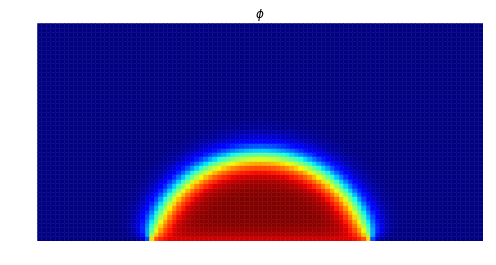

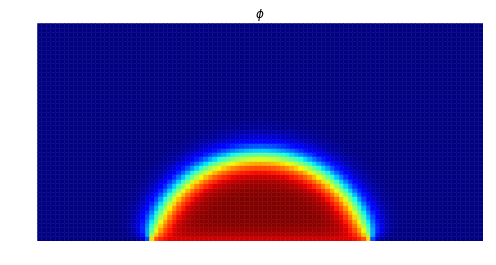

In [25]:
phi, = fp.tools.dump.read("Data/dea054043623/t=600.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.title = ""
vw.plot(filename="Data/dea054043623/t=600.0.png")

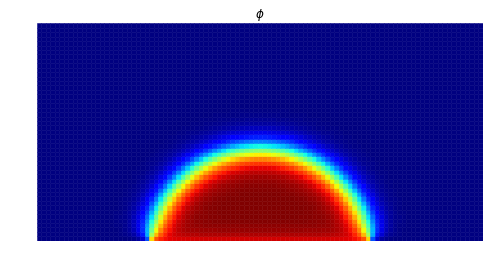

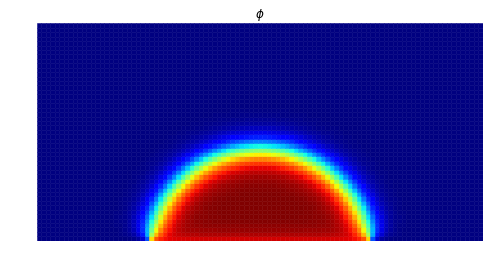

In [24]:
phi, = fp.tools.dump.read("Data/5370d7995942/t=600.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.title = ""
vw.plot(filename="Data/5370d7995942/t=600.0.png")

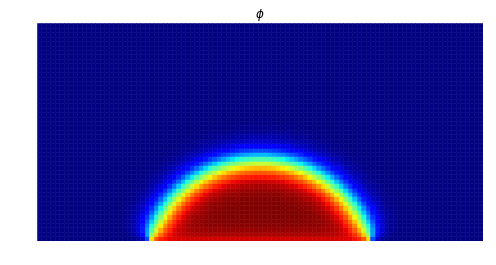

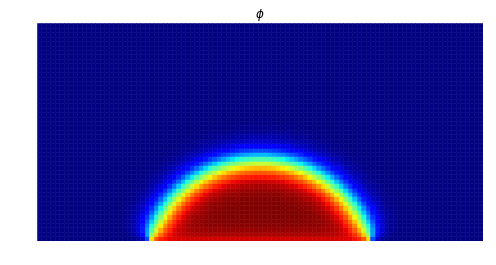

In [26]:
phi, = fp.tools.dump.read("Data/80920a99b0e1/t=600.0.tar.gz")
vw = fp.Viewer(vars=phi, colorbar=False)
vw.axes.axis('off')
vw.title = ""
vw.plot(filename="Data/80920a99b0e1/t=600.0.png")

### $\Delta t = 1.0$

In [9]:
bm8d_dt1_0 = df[(df['main_file'] == 'benchmark8d.py') & (df['--dt'] == 1.0)]
bm8d_dt1_0[['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
64,dea054043623,2019-10-21 19:51:57,2109.698819,[_finished_],40.0,20.0,0.4,1.0,1.00,None
67,5370d7995942,2019-10-22 08:08:26,943.737592,[_finished_],40.0,20.0,0.4,1.0,1.02,None
68,80920a99b0e1,2019-10-22 08:08:36,940.750655,[_finished_],40.0,20.0,0.4,1.0,0.98,None


In [11]:
def plot_phi_save(record, timestep=5000.0):
    fname = "Data/{}/t={}.tar.gz".format(record["label"], timestep)
    phi, = fp.tools.dump.read(fname)
    vw = fp.Viewer(vars=phi)
    fname = "Data/{}/t={}.png".format(record["label"], timestep)
    vw.plot(filename=fname)

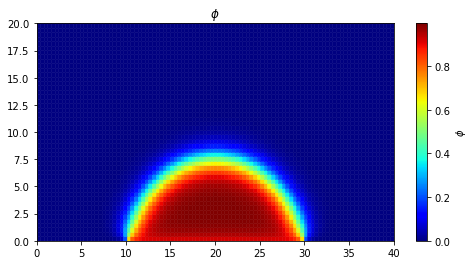

64    None
67    None
68    None
dtype: object

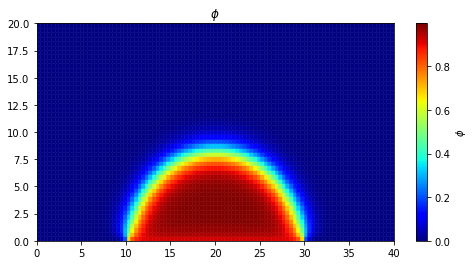

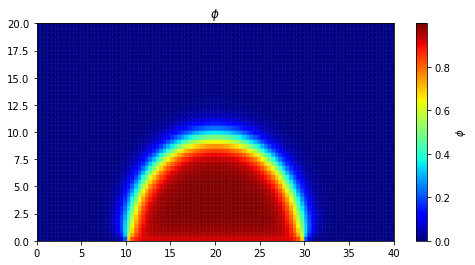

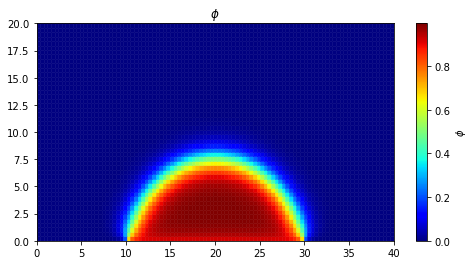

In [12]:
bm8d_dt1_0.apply(plot_phi_save, axis=1, timestep=5000.0)

(0.0, 1.0)

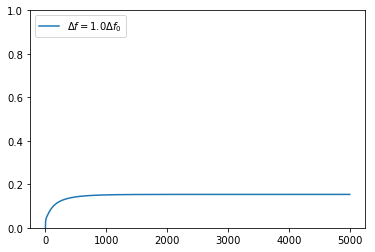

In [51]:
bm8d_dt1_0.apply(plot_fraction, axis=1)
plt.legend(loc="upper left")
plt.ylim(ymin=0., ymax=1.)

### $\Delta t = 0.1$

In [30]:
bm8d_dt0_1 = df[(df['main_file'] == 'benchmark8d.py') & (df['--dt'] == 0.1)]
bm8d_dt0_1[['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
61,2ddc69abe021,2019-10-21 19:51:18,10209.321030,[_finished_],40.0,20.0,0.4,0.1,1.00,None
62,465b621b1181,2019-10-21 19:51:34,10183.188251,[_finished_],40.0,20.0,0.4,0.1,1.02,None
63,2a28eee8e320,2019-10-21 19:51:52,10268.162539,[_finished_],40.0,20.0,0.4,0.1,0.98,None


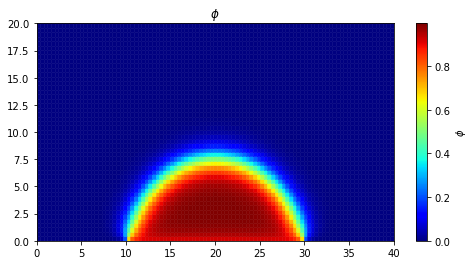

61    None
62    None
63    None
dtype: object

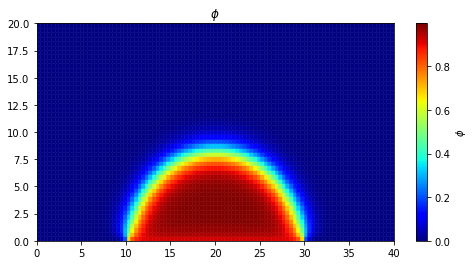

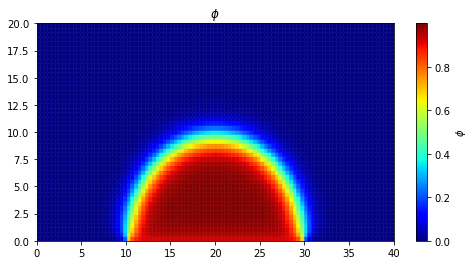

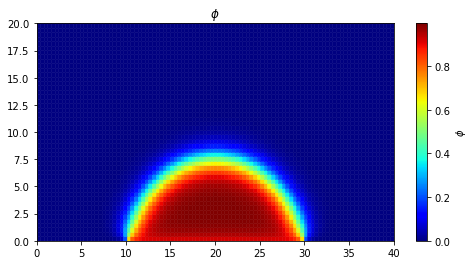

In [31]:
bm8d_dt0_1.apply(plot_phi, axis=1)

(0.0, 1.0)

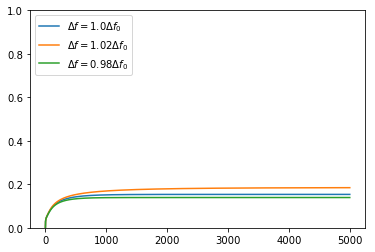

In [50]:
bm8d_dt0_1.apply(plot_fraction, axis=1)
plt.legend(loc="upper left")
plt.ylim(ymin=0., ymax=1.)

### $\Delta t = 0.01$

In [27]:
bm8d_dt0_01 = df[(df['main_file'] == 'benchmark8d.py') & (df['--dt'] == 0.01)]
bm8d_dt0_01[['label', 'timestamp', 'duration', 'tags', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,--Lx,--Ly,--dx,--dt,--factor,--restart
58,25645475dafd,2019-10-21 17:09:52,NaN,[_running_],40.0,20.0,0.4,0.01,1.00,None
59,e64424306261,2019-10-21 17:09:56,NaN,[_running_],40.0,20.0,0.4,0.01,0.98,None
60,3b9c156317ab,2019-10-21 17:09:58,NaN,[_running_],40.0,20.0,0.4,0.01,1.02,None


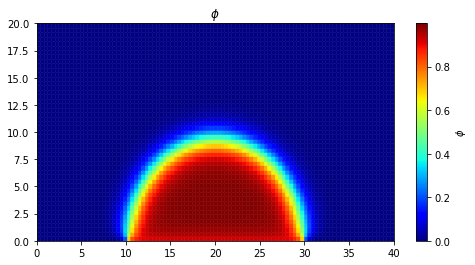

58    None
59    None
60    None
dtype: object

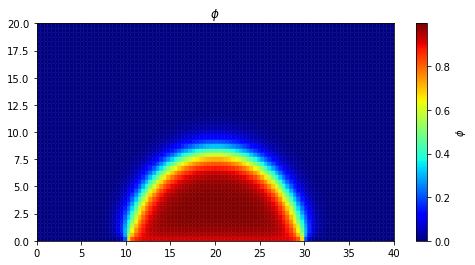

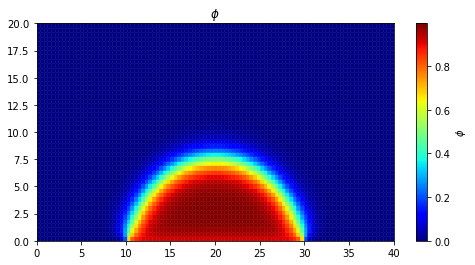

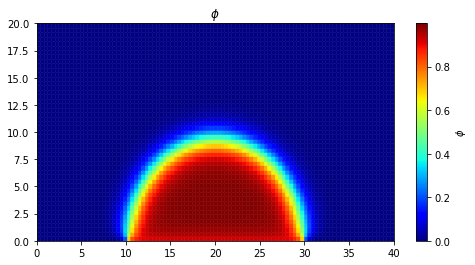

In [29]:
bm8d_dt0_01.apply(plot_phi, axis=1, timestep=2000.)

(0.0, 1.0)

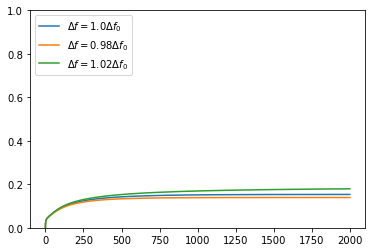

In [49]:
bm8d_dt0_01.apply(plot_fraction, axis=1)
plt.legend(loc="upper left")
plt.ylim(ymin=0., ymax=1.)

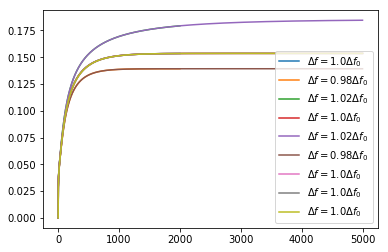

In [53]:
df[df['main_file'] == 'benchmark8d.py'].apply(plot_fraction, axis=1)
plt.legend(loc="lower right")
# plt.legend(loc="upper left")
# plt.ylim(ymin=0., ymax=1.)

## Clean out debugging runs

In [8]:
df[df['tags'].map(lambda x: '_initialized_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart


In [10]:
    
df[df['tags'].map(lambda x: '_initialized_' in x)].label.apply(delete_smt_record)

Series([], Name: label, dtype: object)

In [11]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [12]:
df[df['tags'].map(lambda x: '_running_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
22,31e46d8ab732,2019-10-16 22:51:36,NaN,[_running_],abffcd9ffc0452dd9c9310cc8ba2b8e713108ae2,1000.0,1000.0,0.8,0.04,1.1,None


In [20]:
delete_smt_record("e0c72c426b3e")

OSError: [Errno 39] Directory not empty: 'Data/e0c72c426b3e'

In [22]:
shutil.rmtree(os.path.join("Data", "e0c72c426b3e"))

In [26]:
delete_smt_record("7aeb901c4209")

In [27]:
delete_smt_record("ec8146cf7385")

In [28]:
delete_smt_record("beb034f2217c")

In [29]:
delete_smt_record("b8d0044ef16f")

In [13]:
delete_smt_record("31e46d8ab732")

In [15]:
df = pd.read_json(project.record_store.export('benchmark8'),
                  convert_dates=["timestamp"])

df = df.merge(df.parameters.apply(parameters2columns), left_index=True, right_index=True)
df[['label', 'timestamp', 'duration', 'tags', 'main_file', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

/data/guyer/miniconda3/envs/fipy/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,label,timestamp,duration,tags,main_file,--Lx,--Ly,--dx,--dt,--factor,--restart
0,106f1ffc19bd,2019-10-11 20:47:52,3.513146,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
1,c5ebb4c80fe0,2019-10-13 10:58:00,9.546216,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
2,31058b7cf06d,2019-10-15 11:26:36,25.609991,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
3,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
4,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],benchmark8b.py,100.0,100.0,0.8,0.04,1.10,None
5,e97d9c91f2b4,2019-10-15 17:04:05,17921.533205,[_failed_],benchmark8b.py,1000.0,1000.0,0.8,0.04,1.10,None
6,ad50b5b0effd,2019-10-16 09:08:31,1.390398,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,0.99,None
7,c49ca18b1de2,2019-10-16 09:08:31,1.373949,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None
8,aed02552f12a,2019-10-16 09:08:31,1.189000,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.01,None
9,68d4de7ceac7,2019-10-16 11:51:07,40.346007,[_failed_],benchmark8a.py,100.0,100.0,0.4,0.01,1.00,None


In [16]:
delete_smt_record("135ad521487c")

### other stuff

In [83]:
df[df['tags'].map(lambda x: '_finished_' in x)][['label', 'timestamp', 'duration', 'tags', 'version', '--Lx', '--Ly', '--dx', '--dt', '--factor', '--restart']]

,label,timestamp,duration,tags,version,--Lx,--Ly,--dx,--dt,--factor,--restart
29,3544804c18a0,2019-10-15 16:27:27,1186.884687,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN
30,b8eb47b62e4e,2019-10-15 16:52:27,429.619996,[_finished_],47494c05faac4f6c010e24f84ad4a071582be0ba,100.0,100.0,0.8,0.04,1.1,NaN


In [69]:
print df.loc[df['label'] == '9fe80a61913f'].iloc[0]['stdout_stderr']

Not yet captured.


In [39]:
phi, = fp.tools.dump.read("Data/e97d9c91f2b4/t=80.0.tar.gz")

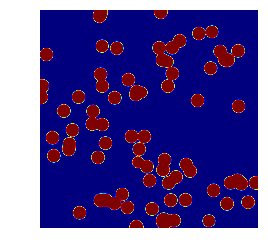

In [66]:
im = plt.imshow(d, cmap='jet', norm=None, aspect=None, interpolation=None,
   alpha=None, vmin=0., vmax=1., origin=None, extent=None)
im.axes.axis('off')
im.write_png("Data/e97d9c91f2b4/t=80.0.png")

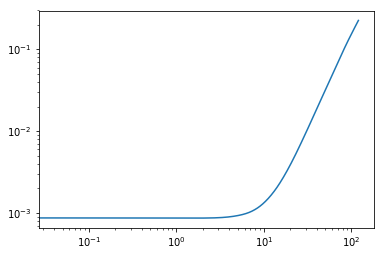

In [137]:
tt, fraction, energy = fp.numerix.loadtxt("Data/e97d9c91f2b4/stats.txt".format(uuid), unpack=True)
plt.loglog(tt, -fp.tools.log10(1-fraction))